<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/eeg_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'eeg-psychiatric-disorders-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1960298%2F3233540%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240909%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240909T020246Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dbc2ff16a9aacb02011a7573bc88f9987468c2a1ba5ce5c64a9986ddb5c95d74acc35027d74d1da756fcca4d97554bf42abf4184088adea590403ab0ae2b1e1b24c9f7c3507f142e13daf801bd3a2485bc1b96dc4418683371206998e77afbf50692043b5cbbe1a7ba690c04ea09613c341cc3b42d995ffb3fd5910e15f4483de6b9ecdd322c2a843cc7b6daa123d7dece6b5ad2e377f2328c575fad8268af9ed95f495240b43d88ce798cfd5faa9bf91b20453238c4ca27dcf317a0c587c6f8cd4419c10cbd7ad0b1b27a54d389514b60c44ec58a96191f21f002a4dbf783ffe1eff93afdc1121607c939d077314b02daa6e32a08eeb043ab847786fb02105f5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv("/kaggle/input/eeg-psychiatric-disorders-dataset/EEG.machinelearing_data_BRMH.csv")

In [ ]:
data.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [ ]:
data.tail()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
940,941,M,22.0,2014.8.28,13.0,116.0,Healthy control,Healthy control,41.851823,36.771496,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,942,M,26.0,2014.9.19,13.0,118.0,Healthy control,Healthy control,18.986856,19.401387,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,943,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,944,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446
944,945,M,21.0,2015.10.23,13.0,105.0,Healthy control,Healthy control,65.195346,69.241972,...,78.600293,68.255430,70.687410,74.433908,74.294750,53.254681,72.755265,47.810386,80.166825,64.380273


In [ ]:
data['education'].value_counts()

education
12.0    239
13.0    226
16.0    225
14.0     83
9.0      27
18.0     26
17.0     25
15.0     20
10.0     19
6.0      15
11.0      6
7.0       6
20.0      3
1.0       3
8.0       2
0.0       2
19.0      1
3.0       1
5.0       1
Name: count, dtype: int64

In [ ]:
data['education'].value_counts()/len(data)

education
12.0    0.252910
13.0    0.239153
16.0    0.238095
14.0    0.087831
9.0     0.028571
18.0    0.027513
17.0    0.026455
15.0    0.021164
10.0    0.020106
6.0     0.015873
11.0    0.006349
7.0     0.006349
20.0    0.003175
1.0     0.003175
8.0     0.002116
0.0     0.002116
19.0    0.001058
3.0     0.001058
5.0     0.001058
Name: count, dtype: float64

In [ ]:
data['main.disorder'].value_counts()
data['main.disorder',"Mood disorder"].value_counts()


KeyError: ('main.disorder', 'Mood disorder')

In [ ]:
data['main.disorder'].value_counts()


main.disorder
Mood disorder                         266
Addictive disorder                    186
Trauma and stress related disorder    128
Schizophrenia                         117
Anxiety disorder                      107
Healthy control                        95
Obsessive compulsive disorder          46
Name: count, dtype: int64

In [ ]:
pd.crosstab(data['main.disorder'], data['specific.disorder'])/len(data)

TypeError: crosstab() missing 1 required positional argument: 'columns'

In [ ]:
data['main.disorder']/len(data)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB


In [ ]:
data.nunique()

no.                      945
sex                        2
age                      654
eeg.date                 722
education                 19
                        ... 
COH.F.gamma.p.P4.r.O1    942
COH.F.gamma.p.P4.s.O2    942
COH.F.gamma.q.T6.r.O1    942
COH.F.gamma.q.T6.s.O2    942
COH.F.gamma.r.O1.s.O2    942
Length: 1149, dtype: int64

In [ ]:
data.isnull().sum()

no.                       0
sex                       0
age                       0
eeg.date                  0
education                15
                         ..
COH.F.gamma.p.P4.r.O1     0
COH.F.gamma.p.P4.s.O2     0
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
Length: 1149, dtype: int64

In [ ]:
(data.isnull().sum()/(len(data)))*100

no.                      0.000000
sex                      0.000000
age                      0.000000
eeg.date                 0.000000
education                1.587302
                           ...   
COH.F.gamma.p.P4.r.O1    0.000000
COH.F.gamma.p.P4.s.O2    0.000000
COH.F.gamma.q.T6.r.O1    0.000000
COH.F.gamma.q.T6.s.O2    0.000000
COH.F.gamma.r.O1.s.O2    0.000000
Length: 1149, dtype: float64

In [ ]:
# Remove S.No. column from data
data = data.drop(['no.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1148 entries, sex to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), object(4)
memory usage: 8.3+ MB


In [ ]:
print(data.Brand.unique())
print(data.Brand.nunique())


AttributeError: 'DataFrame' object has no attribute 'Brand'

main.disorder
Mood disorder                         266
Addictive disorder                    186
Trauma and stress related disorder    128
Schizophrenia                         117
Anxiety disorder                      107
Healthy control                        95
Obsessive compulsive disorder          46
Name: count, dtype: int64


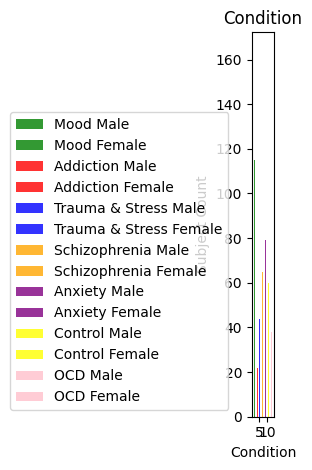

In [34]:
import numpy as np
import matplotlib.pyplot as plt

print(data['main.disorder'].value_counts())

# data to plot
index = 7

mood_f_line = data[(data['main.disorder'] == 'Mood disorder') & (data['sex'] == 'F')]['main.disorder'].value_counts()
mood_m_line = data[(data['main.disorder'] == 'Mood disorder')& (data['sex'] == 'M')]['main.disorder'].value_counts()

addiction_f_line = data[(data['main.disorder'] == 'Addictive disorder')& (data['sex'] == 'F')]['main.disorder'].value_counts()
addiction_m_line = data[(data['main.disorder'] == 'Addictive disorder')& (data['sex'] == 'M')]['main.disorder'].value_counts()

trauma_stress_f_line = data[(data['main.disorder'] == 'Trauma and stress related disorder')& (data['sex'] == 'F')]['main.disorder'].value_counts()
trauma_stress_m_line = data[(data['main.disorder'] == 'Trauma and stress related disorder')& (data['sex'] == 'M')]['main.disorder'].value_counts()

schizophrenia_f_line = data[(data['main.disorder'] == 'Schizophrenia')& (data['sex'] == 'F')]['main.disorder'].value_counts()
schizophrenia_m_line = data[(data['main.disorder'] == 'Schizophrenia')& (data['sex'] == 'M')]['main.disorder'].value_counts()

anxiety_f_line = data[(data['main.disorder'] == 'Anxiety disorder')& (data['sex'] == 'F')]['main.disorder'].value_counts()
anxiety_m_line = data[(data['main.disorder'] == 'Anxiety disorder')& (data['sex'] == 'M')]['main.disorder'].value_counts()

control_f_line = data[(data['main.disorder'] == 'Healthy control')& (data['sex'] == 'F')]['main.disorder'].value_counts()
control_m_line = data[(data['main.disorder'] == 'Healthy control')& (data['sex'] == 'M')]['main.disorder'].value_counts()

ocd_f_line = data[(data['main.disorder'] == 'Obsessive compulsive disorder')& (data['sex'] == 'F')]['main.disorder'].value_counts()
ocd_m_line = data[(data['main.disorder'] == 'Obsessive compulsive disorder')& (data['sex'] == 'M')]['main.disorder'].value_counts()




# create plot
fig, ax = plt.subplots()
index = np.arange(14)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(1, mood_m_line, bar_width,
alpha=opacity,
color='g',
label='Mood Male')
rects2 = plt.bar(2, mood_f_line, bar_width,
alpha=opacity,
color='g',
label='Mood Female')

rects3 = plt.bar(3, addiction_m_line, bar_width,
alpha=opacity,
color='r',
label='Addiction Male')
rects4 = plt.bar(4, addiction_f_line, bar_width,
alpha=opacity,
color='r',
label='Addiction Female')

rects5 = plt.bar(5, trauma_stress_m_line, bar_width,
alpha=opacity,
color='b',
label='Trauma & Stress Male')
rects6 = plt.bar(6, trauma_stress_f_line, bar_width,
alpha=opacity,
color='b',
label='Trauma & Stress Female')

rects7 = plt.bar(7, schizophrenia_m_line, bar_width,
alpha=opacity,
color='orange',
label='Schizophrenia Male')
rects8 = plt.bar(8, schizophrenia_f_line, bar_width,
alpha=opacity,
color='orange',
label='Schizophrenia Female')

rects9 = plt.bar(9, anxiety_m_line, bar_width,
alpha=opacity,
color='purple',
label='Anxiety Male')
rects10 = plt.bar(10, anxiety_f_line, bar_width,
alpha=opacity,
color='purple',
label='Anxiety Female')

rects11 = plt.bar(11, control_m_line, bar_width,
alpha=opacity,
color='yellow',
label='Control Male')
rects12 = plt.bar(12, control_f_line, bar_width,
alpha=opacity,
color='yellow',
label='Control Female')

rects13 = plt.bar(13, ocd_m_line, bar_width,
alpha=opacity,
color='pink',
label='OCD Male')
rects14 = plt.bar(14, ocd_f_line, bar_width,
alpha=opacity,
color='pink',
label='OCD Female')


plt.xlabel('Condition')
plt.ylabel('Subject Count')
plt.title('Condition')

plt.legend(bbox_to_anchor=(-0.73,0), loc='lower right')


plt.tight_layout()
plt.show()

In [ ]:
print(data[data['main.disorder'] == 'Mood disorder']['main.disorder'].value_counts()
)


main.disorder
Mood disorder    266
Name: count, dtype: int64


In [ ]:
data.describe().T

In [ ]:
data.describe(include='all').T

In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plot.figure(figsize = (15, 4))
    plot.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plot.ylabel('count')
    plot.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plot.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()